In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import warnings
warnings.filterwarnings('ignore')

In [55]:
### read the tab separated file containing healthcare provider data as a pandas DataFrame

provider_df = pd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2017_subset.txt', "\t")

provider_df.tail()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
999994,1104125277,SHEIKHADEN,ZAKARIA,H,D.O,M,I,401 W GREENLAWN AVE,NaN,LANSING,...,93306,Ultrasound examination of heart including colo...,N,149.0,148.0,149.0,63.604698,200.000000,49.320872,49.815168
999995,1104125277,SHEIKHADEN,ZAKARIA,H,D.O,M,I,401 W GREENLAWN AVE,NaN,LANSING,...,93306,Ultrasound examination of heart including colo...,N,108.0,108.0,108.0,73.533519,232.407407,56.764630,58.036481
999996,1104125277,SHEIKHADEN,ZAKARIA,H,D.O,M,I,401 W GREENLAWN AVE,NaN,LANSING,...,93308,Follow-up or limited ultrasound examination of...,N,11.0,11.0,11.0,25.670000,87.000000,20.130000,20.244545
999997,1104125277,SHEIKHADEN,ZAKARIA,H,D.O,M,I,401 W GREENLAWN AVE,NaN,LANSING,...,99202,"New patient office or other outpatient visit, ...",N,49.0,49.0,49.0,72.521020,155.000000,56.342449,58.230816
999998,1104125277,SHEIKHADEN,ZAKARIA,H,D.O,M,I,401 W GREENLAWN AVE,NaN,LANSING,...,99212,Established patient office or other outpatient...,N,91.0,87.0,91.0,42.073407,65.000000,32.262967,33.514066


In [56]:
convicted_df = pd.read_csv('LEIE.csv')
convicted_df.head()

,LASTNAME,FIRSTNAME,MIDNAME,BUSNAME,GENERAL,SPECIALTY,UPIN,NPI,DOB,ADDRESS,CITY,STATE,ZIP,EXCLTYPE,EXCLDATE,REINDATE,WAIVERDATE,WVRSTATE
0,NaN,NaN,,14 LAWRENCE AVE PHARMACY,PHARMACY,NaN,NaN,0,NaN,14 LAWRENCE AVENUE,SMITHTOWN,NY,11787,1128a1,19880830,0,0,NaN
1,NaN,NaN,,143 MEDICAL EQUIPMENT CO,DME COMPANY,DME - OXYGEN,NaN,0,NaN,701 NW 36 AVENUE,MIAMI,FL,33125,1128b7,19970620,0,0,NaN
2,NaN,NaN,,184TH STREET PHARMACY CORP,OTHER BUSINESS,PHARMACY,NaN,1922348218,NaN,69 E 184TH ST,BRONX,NY,10468,1128a1,20180419,0,0,NaN
3,NaN,NaN,,1951 FLATBUSH AVENUE PHARMACY,PHARMACY,NaN,NaN,0,NaN,1951 FLATBUSH AVE,BROOKLYN,NY,11234,1128b5,20090319,0,0,NaN
4,NaN,NaN,,"1ST COMMUNITY HEALTH CTR, LTD",CLINIC,NaN,NaN,0,NaN,3138 W CERMAK ROAD,CHICAGO,IL,60623,1128a1,19940524,0,0,NaN


In [57]:
provider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 26 columns):
npi                                 999999 non-null int64
nppes_provider_last_org_name        999995 non-null object
nppes_provider_first_name           955835 non-null object
nppes_provider_mi                   705274 non-null object
nppes_credentials                   925609 non-null object
nppes_provider_gender               955851 non-null object
nppes_entity_code                   999998 non-null object
nppes_provider_street1              999998 non-null object
nppes_provider_street2              408587 non-null object
nppes_provider_city                 999998 non-null object
nppes_provider_zip                  999998 non-null object
nppes_provider_state                999998 non-null object
nppes_provider_country              999998 non-null object
provider_type                       999998 non-null object
medicare_participation_indicator    999998 non-null object
place

In [58]:
provider_df.describe()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
count,9.999990e+05,9.999980e+05,999998.000000,9.999980e+05,999998.000000,999998.000000,999998.000000,999998.000000
mean,1.049545e+09,2.529181e+02,87.261573,1.393511e+02,102.522973,353.578282,78.245665,78.963527
std,2.950104e+07,8.489920e+03,1291.207606,2.199335e+03,278.592127,1048.651758,216.729519,217.206484
min,1.000000e+00,1.100000e+01,11.000000,1.100000e+01,0.001012,0.001012,0.000000,0.000000
25%,1.023116e+09,2.100000e+01,17.000000,2.000000e+01,24.388473,58.250000,19.404902,20.213518
50%,1.053318e+09,4.300000e+01,32.000000,4.000000e+01,65.200000,146.512607,47.095721,47.856875
75%,1.073664e+09,1.170000e+02,75.000000,1.060000e+02,113.762272,300.000000,85.370507,85.301444
max,1.104125e+09,7.195536e+06,569024.000000,1.199227e+06,38792.820313,96263.396875,30411.422812,30411.422812


In [59]:
convicted_df.describe()

,NPI,DOB,ZIP,EXCLDATE,REINDATE,WAIVERDATE
count,7.267600e+04,6.869100e+04,72676.000000,7.267600e+04,72676.0,7.267600e+04
mean,1.096020e+08,1.961971e+07,51420.786642,2.006805e+07,0.0,4.148421e+03
std,3.979338e+08,1.404949e+05,29593.928817,8.143594e+04,0.0,2.887307e+05
min,0.000000e+00,1.901010e+07,0.000000,1.977070e+07,0.0,0.000000e+00
25%,0.000000e+00,1.953032e+07,29918.000000,2.001052e+07,0.0,0.000000e+00
50%,0.000000e+00,1.962041e+07,45694.000000,2.007102e+07,0.0,0.000000e+00
75%,0.000000e+00,1.972050e+07,78416.000000,2.014052e+07,0.0,0.000000e+00
max,1.992979e+09,1.999043e+07,99927.000000,2.019122e+07,0.0,2.017062e+07


Looking for null values. 

In [60]:
pd.isnull(provider_df).any()

npi                                 False
nppes_provider_last_org_name         True
nppes_provider_first_name            True
nppes_provider_mi                    True
nppes_credentials                    True
nppes_provider_gender                True
nppes_entity_code                    True
nppes_provider_street1               True
nppes_provider_street2               True
nppes_provider_city                  True
nppes_provider_zip                   True
nppes_provider_state                 True
nppes_provider_country               True
provider_type                        True
medicare_participation_indicator     True
place_of_service                     True
hcpcs_code                           True
hcpcs_description                    True
hcpcs_drug_indicator                 True
line_srvc_cnt                        True
bene_unique_cnt                      True
bene_day_srvc_cnt                    True
average_Medicare_allowed_amt         True
average_submitted_chrg_amt        

In [61]:
npi_agg = provider_df.groupby('npi') ### grouping the data on npi

In [62]:
npi_agg['npi'].nunique()

npi
1             1
1003000126    1
1003000134    1
1003000142    1
1003000407    1
             ..
1104124809    1
1104124858    1
1104125012    1
1104125228    1
1104125277    1
Name: npi, Length: 105315, dtype: int64

In [63]:
npi_tot = npi_agg['npi'].value_counts() ### Count the number of instances for each NPI

In [64]:
index = provider_df.columns ### gives the columns of the DF. .index will give the row index and .values will give the values

index

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1', 'nppes_provider_street2',
       'nppes_provider_city', 'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service', 'hcpcs_code',
       'hcpcs_description', 'hcpcs_drug_indicator', 'line_srvc_cnt',
       'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt',
       'average_submitted_chrg_amt', 'average_Medicare_payment_amt',
       'average_Medicare_standard_amt'],
      dtype='object')

In [65]:
provider_df = provider_df[1:]

In [89]:
### selecting the important attributes/features

selected_provider_data = provider_df[['npi', 'nppes_provider_gender', 'provider_type', 
                             'line_srvc_cnt', 'bene_unique_cnt', 'bene_day_srvc_cnt',
                             'average_submitted_chrg_amt', 'average_Medicare_allowed_amt', 
                             'average_Medicare_payment_amt']].dropna(axis=0)


In [90]:
selected_provider_data.head()
print(selected_provider_data['npi'].describe())

nadropped = selected_provider_data.dropna(axis=0)

print(nadropped['npi'].describe())



count    9.558510e+05
mean     1.049500e+09
std      2.952605e+07
min      1.003000e+09
25%      1.023108e+09
50%      1.053317e+09
75%      1.073667e+09
max      1.104125e+09
Name: npi, dtype: float64
count    9.558510e+05
mean     1.049500e+09
std      2.952605e+07
min      1.003000e+09
25%      1.023108e+09
50%      1.053317e+09
75%      1.073667e+09
max      1.104125e+09
Name: npi, dtype: float64


In [91]:
convicted_df.columns

Index(['LASTNAME', 'FIRSTNAME', 'MIDNAME', 'BUSNAME', 'GENERAL', 'SPECIALTY',
       'UPIN', 'NPI', 'DOB', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'EXCLTYPE',
       'EXCLDATE', 'REINDATE', 'WAIVERDATE', 'WVRSTATE'],
      dtype='object')

In [92]:
selected_convicted_data = convicted_df[['NPI']].dropna(axis=0)

In [94]:
merged_dataset = pd.merge(selected_provider_data, selected_convicted_data, 
                          how='right', left_on='npi', right_on='NPI').dropna(axis=0)

merged_dataset

,npi,nppes_provider_gender,provider_type,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_allowed_amt,average_Medicare_payment_amt,NPI
0,1.003128e+09,M,Internal Medicine,617.0,499.0,617.0,332.463533,219.944716,170.918590,1003127655
1,1.003128e+09,M,Internal Medicine,249.0,17.0,249.0,69.899598,42.570080,33.024418,1003127655
2,1.003128e+09,M,Internal Medicine,1220.0,235.0,1220.0,120.000000,78.414213,61.340197,1003127655
3,1.003128e+09,M,Internal Medicine,754.0,434.0,754.0,172.590186,113.284987,88.611313,1003127655
4,1.003128e+09,M,Internal Medicine,543.0,448.0,543.0,188.176796,117.852320,91.907495,1003127655
...,...,...,...,...,...,...,...,...,...,...
154,1.093801e+09,M,Family Practice,357.0,140.0,304.0,10.000000,0.119580,0.095490,1093800609
155,1.093801e+09,M,Family Practice,228.0,52.0,80.0,15.000000,0.644561,0.468114,1093800609
156,1.093801e+09,M,Family Practice,121.0,18.0,61.0,35.000000,12.505124,9.645785,1093800609
157,1.093801e+09,M,Family Practice,94.0,24.0,27.0,10.000000,1.822128,1.295851,1093800609


In [96]:
%matplotlib inline

merged_dataset.describe()

,npi,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_allowed_amt,average_Medicare_payment_amt,NPI
count,1.590000e+02,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,1.590000e+02
mean,1.053593e+09,360.088050,93.981132,249.798742,361.226867,90.594248,66.904471,1.053593e+09
std,3.659666e+07,1110.262464,135.983733,552.493253,805.423425,119.135791,91.504893,3.659666e+07
min,1.003128e+09,11.000000,11.000000,11.000000,2.000000,0.024168,0.018448,1.003128e+09
25%,1.013010e+09,30.000000,18.500000,28.000000,62.575778,23.390000,17.444245,1.013010e+09
50%,1.063421e+09,80.000000,43.000000,70.000000,129.393163,70.637128,47.180000,1.063421e+09
75%,1.093801e+09,218.000000,97.500000,190.000000,266.846218,116.135000,85.917260,1.093801e+09
max,1.093801e+09,10762.000000,737.000000,4439.000000,5400.000000,1151.485000,876.932381,1.093801e+09


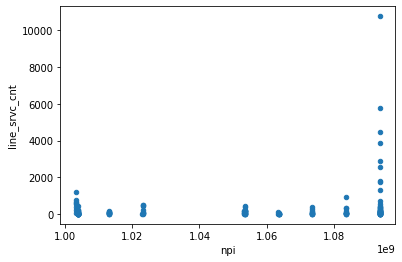

In [98]:
merged_dataset.plot(kind='scatter', x='npi', y='line_srvc_cnt')

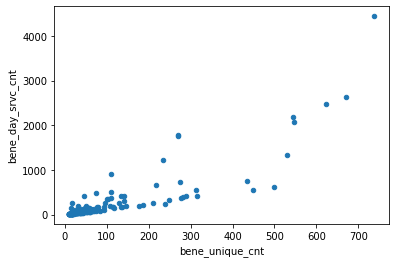

In [100]:
merged_dataset.plot(kind='scatter', x='bene_unique_cnt', y='bene_day_srvc_cnt')